# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [3]:
cities

['port-aux-francais',
 'shache',
 'naze',
 'boiling spring lakes',
 'fostoria',
 'qaqortoq',
 'santa rosalia',
 'masterton',
 'machico',
 'metlili chaamba',
 'yellowknife',
 'punta arenas',
 'bilibino',
 'senanga',
 'waitangi',
 'adamstown',
 'selfoss',
 'udachny',
 'isafjordur',
 'kyabram',
 'olonkinbyen',
 'bintulu',
 'grytviken',
 'baxter',
 'vorkuta',
 'port lincoln',
 'macomb',
 'hawaiian paradise park',
 'ribeira brava',
 'esquina',
 'nadi',
 'fortuna',
 'cabedelo',
 'jamestown',
 'lebu',
 'ahau',
 'utrik',
 'vingt cinq',
 'kotido',
 'taiohae',
 'ballina',
 'arucas',
 'colonia menno',
 'huanta',
 'mingguang',
 'aasiaat',
 'puerto ayora',
 'papatowai',
 'valparaiso',
 'tranovaho',
 'san antonio de pale',
 'hamilton',
 'kamaishi',
 'iquique',
 'pujehun',
 'iskateley',
 'puerto natales',
 'livingstone',
 'cadale',
 'dudinka',
 'bethel',
 'edinburgh of the seven seas',
 'talnakh',
 'bredasdorp',
 'callao',
 'lihue',
 'sakakah',
 'college',
 'ejura',
 'anibare',
 'anadyr',
 'badger',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metrics&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | labuan bajo
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | benguela
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | samana
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | belyy yar
Processing Record 11 of Set 1 | fort mcmurray
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | lagoa formosa
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | nago
Processing Record 18 of Set 1 | general conesa
Processing Record 19 of Set 1 | tabou
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | vilyuchinsk
Processing Record 22 of Set 1 | yello

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,labuan bajo,-8.4964,119.8877,296.50,86,11,2.88,ID,1720127123
1,waitangi,-43.9535,-176.5597,281.94,96,100,3.13,NZ,1720127124
2,benguela,-12.5763,13.4055,293.11,87,80,1.85,AO,1720126833
3,georgetown,5.4112,100.3354,298.12,84,20,0.51,MY,1720127126
4,port-aux-francais,-49.3500,70.2167,275.23,96,100,13.04,TF,1720127128


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labuan bajo,-8.4964,119.8877,296.50,86,11,2.88,ID,1720127123
1,waitangi,-43.9535,-176.5597,281.94,96,100,3.13,NZ,1720127124
2,benguela,-12.5763,13.4055,293.11,87,80,1.85,AO,1720126833
3,georgetown,5.4112,100.3354,298.12,84,20,0.51,MY,1720127126
4,port-aux-francais,-49.3500,70.2167,275.23,96,100,13.04,TF,1720127128


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

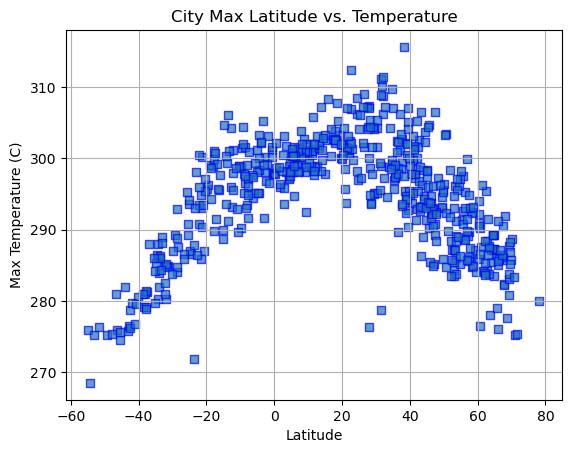

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="blue",
    linewidths=1,
    marker='s',
    alpha=0.7,
    label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel ("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

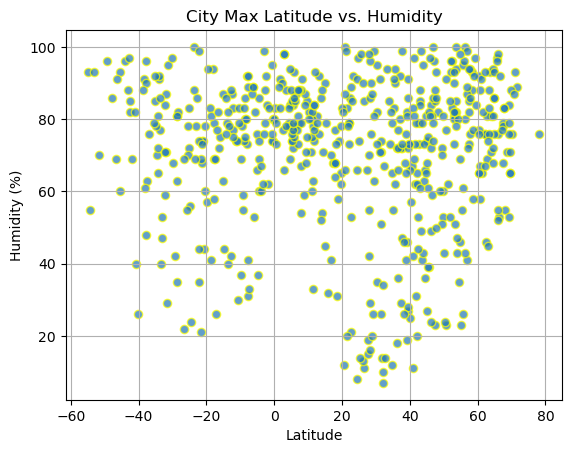

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="yellow",
    linewidths=1,
    marker='o',
    alpha=0.7,
    label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel ("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

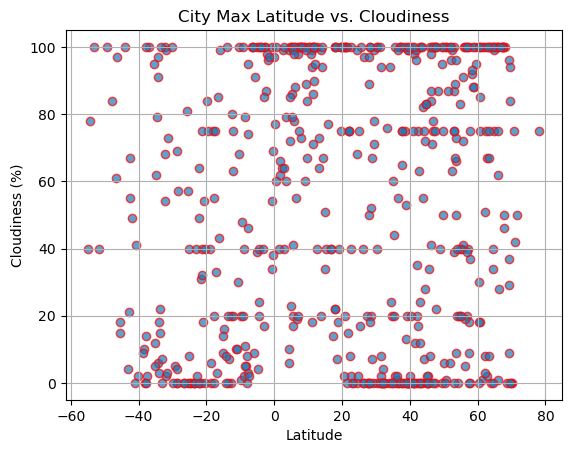

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="red",
    linewidths=1,
    marker='o',
    alpha=0.7,
    label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

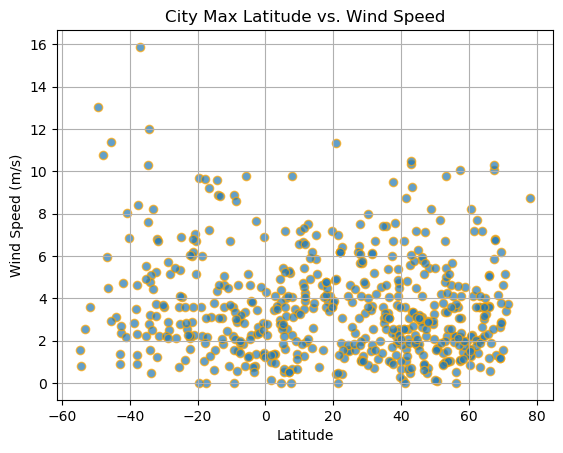

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="orange",
    linewidths=1,
    marker='o',
    alpha=0.7,
    label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere, line_eq):
    plt.scatter(x_values, y_values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq, hemisphere, fontsize=15, color="red")
    plt.plot(x_values, y_values, color="red")
    plt.grid(True)
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,georgetown,5.4112,100.3354,298.12,84,20,0.51,MY,1720127126
6,whitehorse,60.7161,-135.0538,290.27,58,75,1.54,CA,1720127130
7,samana,19.2056,-69.3369,303.27,74,40,4.12,DO,1720127131
9,belyy yar,53.6039,91.3903,286.09,100,9,1.00,RU,1720127134
10,fort mcmurray,56.7268,-111.3810,299.92,41,20,3.60,CA,1720127135


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,labuan bajo,-8.4964,119.8877,296.50,86,11,2.88,ID,1720127123
1,waitangi,-43.9535,-176.5597,281.94,96,100,3.13,NZ,1720127124
2,benguela,-12.5763,13.4055,293.11,87,80,1.85,AO,1720126833
4,port-aux-francais,-49.3500,70.2167,275.23,96,100,13.04,TF,1720127128
5,blackmans bay,-43.0167,147.3167,275.78,88,4,0.89,AU,1720127129


###  Temperature vs. Latitude Linear Regression Plot

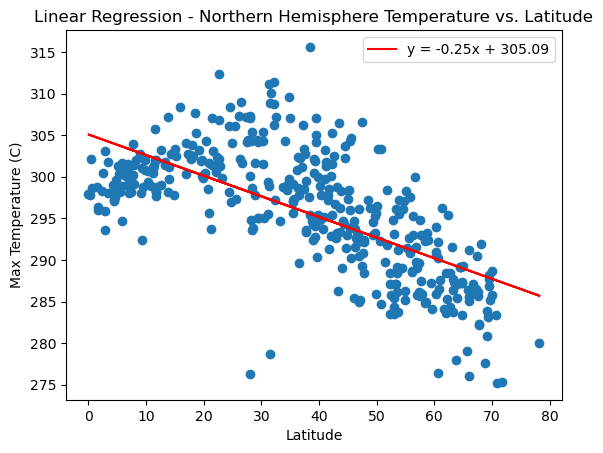

the r-value is:-0.6713634548856597


In [17]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)

# Get regression values
regress_values_northern = x_values_northern * slope + intercept

# Create line equation
line_eq_northern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-", label=line_eq_northern)
plt.title("Linear Regression - Northern Hemisphere Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

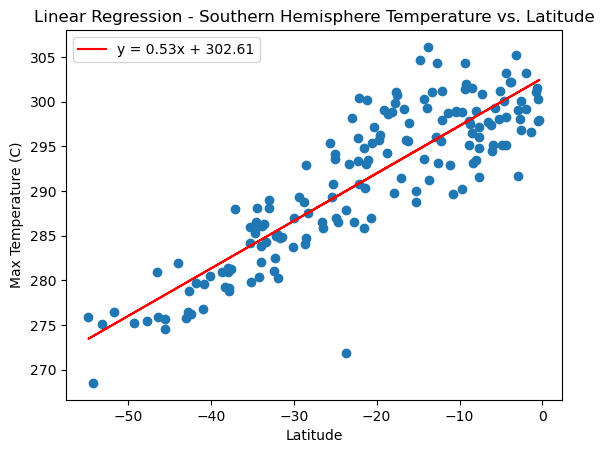

the r-value is:0.8726757724632871


In [18]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)

# Get regression values
regress_values_southern = x_values_southern * slope + intercept

# Create line equation
line_eq_southern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-", label=line_eq_southern)
plt.title("Linear Regression - Southern Hemisphere Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

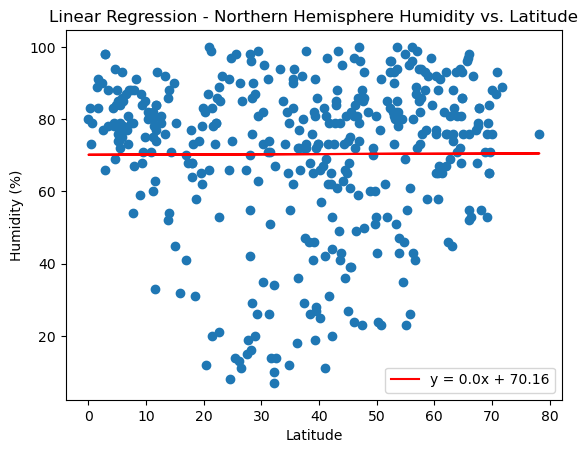

the r-value is:0.004216130407273242


In [19]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)

# Get regression values
regress_values_northern = x_values_northern * slope + intercept

# Create line equation
line_eq_northern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-", label=line_eq_northern)
plt.title("Linear Regression - Northern Hemisphere Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

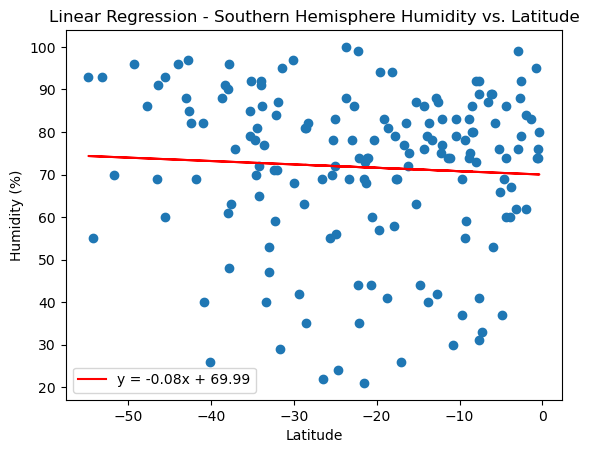

the r-value is:-0.059385796695166936


In [20]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)

# Get regression values
regress_values_southern = x_values_southern * slope + intercept

# Create line equation
line_eq_southern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-", label=line_eq_southern)
plt.title("Linear Regression - Southern Hemisphere Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

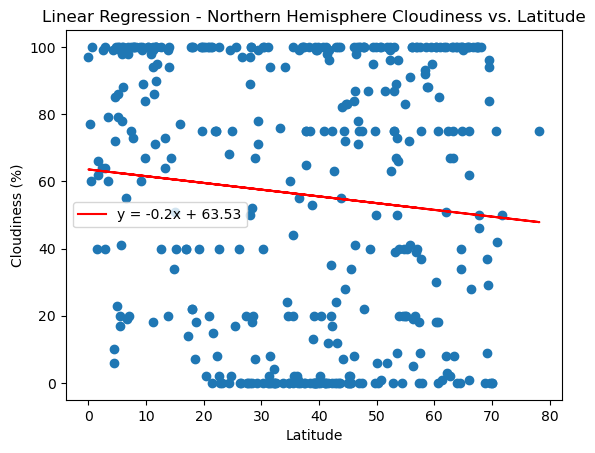

the r-value is:-0.10017426259729874


In [21]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)

# Get regression values
regress_values_northern = x_values_northern * slope + intercept

# Create line equation
line_eq_northern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-", label=line_eq_northern)
plt.title("Linear Regression - Northern Hemisphere Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

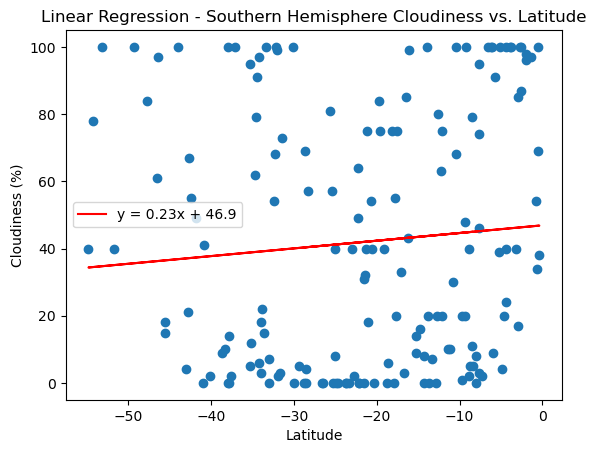

the r-value is:0.08478729345098888


In [22]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)

# Get regression values
regress_values_southern = x_values_southern * slope + intercept

# Create line equation
line_eq_southern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-", label=line_eq_southern)
plt.title("Linear Regression - Southern Hemisphere Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

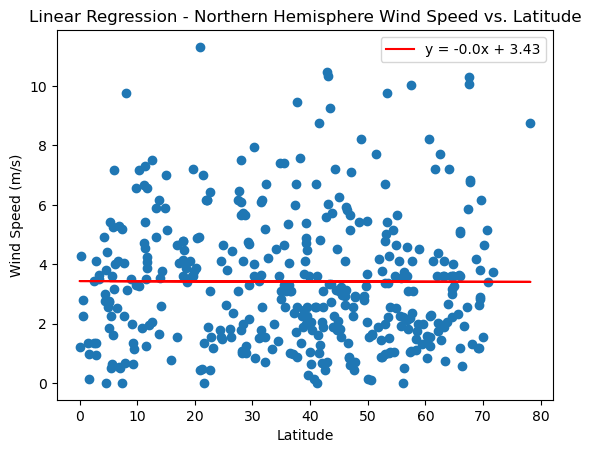

the r-value is:-0.003055189306079612


In [23]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_northern, y_values_northern)

# Get regression values
regress_values_northern = x_values_northern * slope + intercept

# Create line equation
line_eq_northern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line
plt.scatter(x_values_northern, y_values_northern)
plt.plot(x_values_northern, regress_values_northern, "r-", label=line_eq_northern)
plt.title("Linear Regression - Northern Hemisphere Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

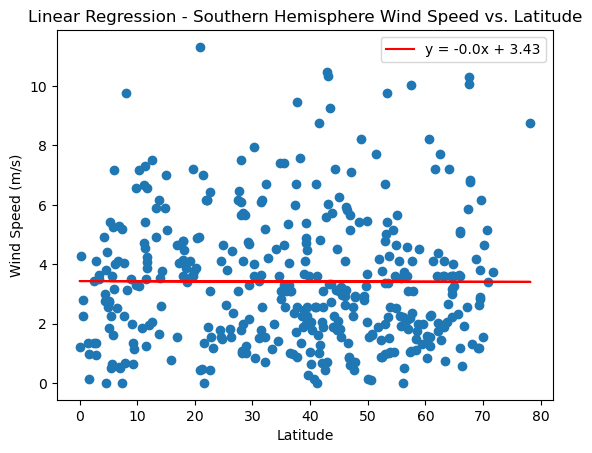

the r-value is:-0.003055189306079612


In [24]:
# Southern Hemisphere
x_values_southern = northern_hemi_df["Lat"]
y_values_southern = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_southern, y_values_southern)

# Get regression values
regress_values_southern = x_values_southern * slope + intercept

# Create line equation
line_eq_southern = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot all data points and the linear regression line
plt.scatter(x_values_southern, y_values_southern)
plt.plot(x_values_southern, regress_values_southern, "r-", label=line_eq_southern)
plt.title("Linear Regression - Southern Hemisphere Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.legend()
plt.show()

print(f"the r-value is:{rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE